In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import random
import matplotlib.pyplot as plt  
from scipy.stats import norm  
import keras
from keras.models import Sequential
from keras.initializers import VarianceScaling,RandomNormal
from keras.layers import Input, Dense, Dropout, Conv2D, MaxPooling2D
from keras.layers import UpSampling2D, Reshape, Lambda, Flatten, Activation
from keras.models import Model  
from keras.optimizers import SGD, Adadelta, Adagrad,Adam
from keras import backend as K  
from keras import objectives  
from keras.utils.vis_utils import plot_model  
from keras.utils import np_utils, generic_utils
import sys 
import tensorflow as tf
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import sklearn
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn import manifold, datasets
from sklearn.utils import check_random_state
from sklearn import metrics



Using TensorFlow backend.


In [3]:
path = os.listdir('cstor/xsede/users/xs-haosun/SDSS_2000/')
#pick up the 1st image to have a look   
path_now = path[0]
a = np.load('cstor/xsede/users/xs-haosun/SDSS_2000/'+str(path_now))
Obj_ID = []
Image = []
Class = []
Redshift = []
for i in range(len(path)):
    path_now = path[i]
    a = np.load('cstor/xsede/users/xs-haosun/SDSS_2000/'+str(path_now))
    for j in range(a.shape[0]):
        Obj_ID.append(a[j]['objID'])
        Image.append(a[j]['image'])
        Class.append(a[j]['class'])
        Redshift.append(a[j]['z'])
Obj_ID = np.asarray(Obj_ID)
Image = np.asarray(Image)
Class = np.asarray(Class)
Redshift = np.asarray(Redshift)
Class[Class=='STAR'] = 0
Class[Class=='GALAXY'] = 1
Class[Class=='QSO'] = 2
Class = Class.astype(int)

Image_RGB = np.empty((len(Image),64,64,3))#(14142,64,64,3) RGB images
for i in range(len(Image)):
    #b[i] = np.stack((a[i][1][0],a[i][1][1],a[i][1][2],a[i][1][3],a[i][1][4]),axis=-1)
    Image_RGB[i] = np.stack((Image[i][3],Image[i][2],Image[i][1]),axis=-1)


for i in range(len(Image_RGB)):
    if True in np.isnan(Image_RGB[i]).reshape(64*64*3):
        print(i)
        Image_RGB[i][np.isnan(Image_RGB[i])==True]=np.mean(Image_RGB[i-1])
        
Image_RGB -= np.mean(Image_RGB)
Image_RGB /= np.max(Image_RGB)

8645


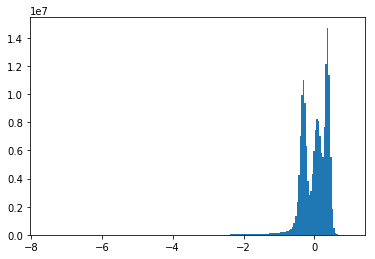

In [4]:
plt.hist(Image_RGB.reshape(-1,),200)
plt.show()

In [5]:
label = np_utils.to_categorical(Class, 3)
data = Image_RGB
index = [i for i in range(len(data))]
#random.shuffle(index)
train_data = data[index]
train_label = label[index]
Class = Class[index]
Redshift = Redshift[index]
print('train_data.shape:',train_data.shape)
print('train_label.shape:',train_label.shape)

train_data.shape: (14142, 64, 64, 3)
train_label.shape: (14142, 3)


Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 13s - loss: -7368.7134 - val_loss: -7798.0555
Epoch 2/50
12000/12000 [==============================] - 12s - loss: -7814.9258 - val_loss: -8022.9171
Epoch 3/50
12000/12000 [==============================] - 13s - loss: -7956.7017 - val_loss: -8052.6686
Epoch 4/50
12000/12000 [==============================] - 12s - loss: -7979.5424 - val_loss: -7137.8738
Epoch 5/50
12000/12000 [==============================] - 12s - loss: -7979.8140 - val_loss: -8043.1018
Epoch 6/50
12000/12000 [==============================] - 12s - loss: -7999.2769 - val_loss: -8059.8050
Epoch 7/50
12000/12000 [==============================] - 12s - loss: -8025.3562 - val_loss: -7878.8298
Epoch 8/50
12000/12000 [==============================] - 12s - loss: -8018.4995 - val_loss: -7968.3847
Epoch 9/50
12000/12000 [==============================] - 12s - loss: -8034.7460 - val_loss: -8057.4759
Epoch 10/50
120

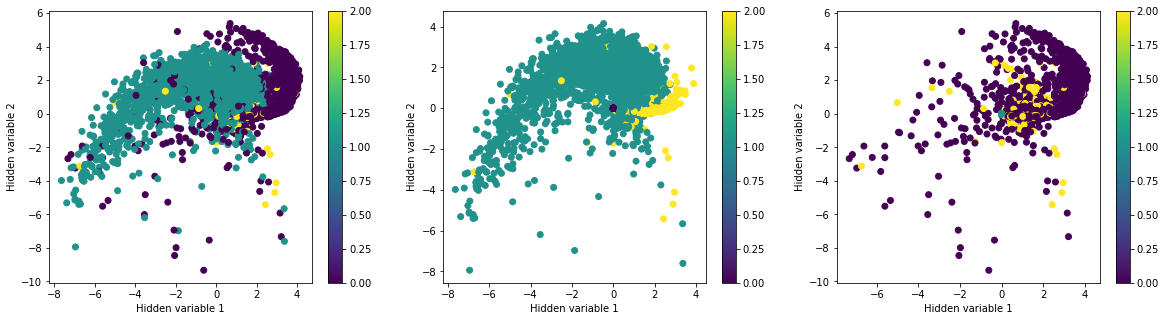

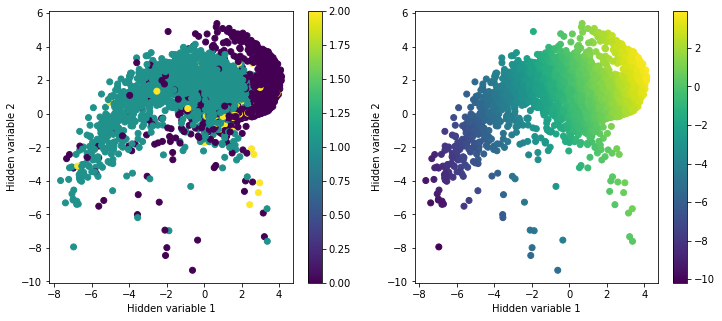

10000
AUC: 0.789398571743
10000
AUC: 0.210601428257
I =  9999 this time, the AUC is: 0.789398571743
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 13s - loss: -7378.0146 - val_loss: -7575.8243
Epoch 2/50
12000/12000 [==============================] - 12s - loss: -7784.7958 - val_loss: -7935.0787
Epoch 3/50
12000/12000 [==============================] - 13s - loss: -7906.4315 - val_loss: -8030.7442
Epoch 4/50
12000/12000 [==============================] - 13s - loss: -7946.1604 - val_loss: -8056.0127
Epoch 5/50
12000/12000 [==============================] - 13s - loss: -8000.2510 - val_loss: -7976.1790
Epoch 6/50
12000/12000 [==============================] - 13s - loss: -7991.7059 - val_loss: -8038.5920
Epoch 7/50
12000/12000 [==============================] - 13s - loss: -8029.8372 - val_loss: -8063.4158
Epoch 8/50
12000/12000 [==============================] - 13s - loss: -8028.7523 - val_loss: -8049.9951
Epoch 9/50
12000/12

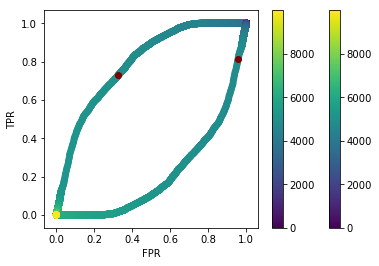

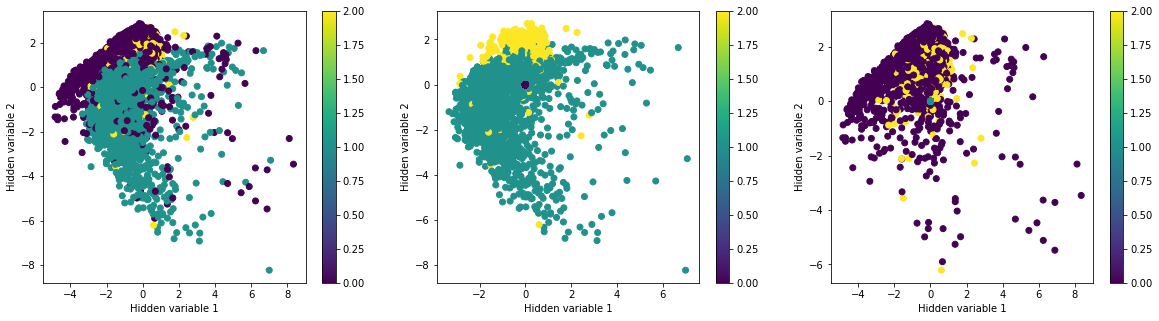

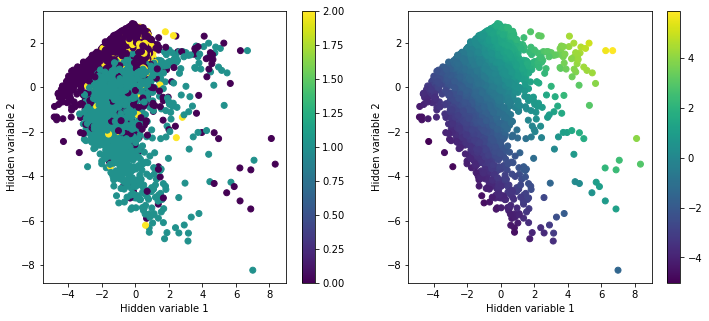

10000
AUC: 0.769831606651
10000
AUC: 0.230168393349
I =  9999 this time, the AUC is: 0.769831606651
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 12s - loss: -7442.3261 - val_loss: -7819.9132
Epoch 2/50
12000/12000 [==============================] - 12s - loss: -7919.2587 - val_loss: -7949.4743
Epoch 3/50
12000/12000 [==============================] - 13s - loss: -7938.6753 - val_loss: -8010.5075
Epoch 4/50
12000/12000 [==============================] - 12s - loss: -7995.0831 - val_loss: -7889.4894
Epoch 5/50
12000/12000 [==============================] - 12s - loss: -7999.8658 - val_loss: -8065.7513
Epoch 6/50
12000/12000 [==============================] - 12s - loss: -8010.3269 - val_loss: -8063.6306
Epoch 7/50
12000/12000 [==============================] - 12s - loss: -8024.9146 - val_loss: -7991.4317
Epoch 8/50
12000/12000 [==============================] - 12s - loss: -8026.3991 - val_loss: -8068.3727
Epoch 9/50
12000/12

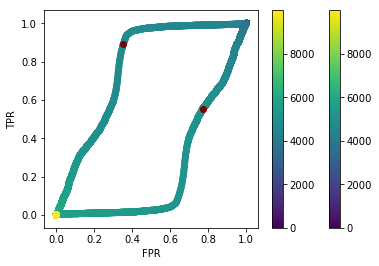

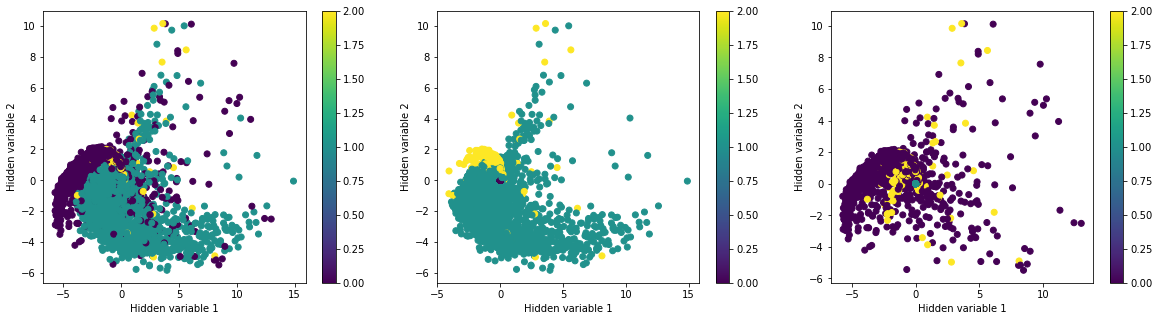

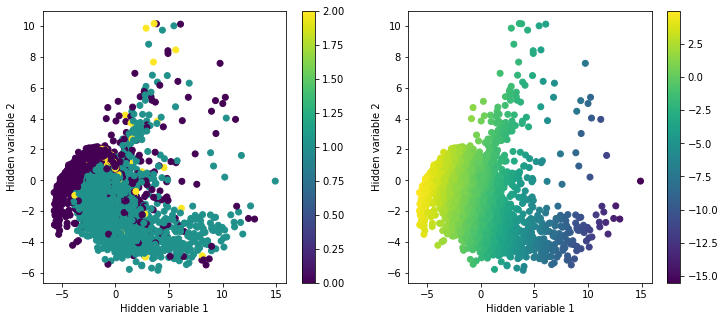

10000
AUC: 0.725275885901
10000
AUC: 0.274724114099
I =  9999 this time, the AUC is: 0.725275885901
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 12s - loss: -7371.5031 - val_loss: -7804.3858
Epoch 2/50
12000/12000 [==============================] - 12s - loss: -7866.6824 - val_loss: -7924.4707
Epoch 3/50
12000/12000 [==============================] - 12s - loss: -7955.1534 - val_loss: -8057.7536
Epoch 4/50
12000/12000 [==============================] - 12s - loss: -7972.1917 - val_loss: -7985.0561
Epoch 5/50
12000/12000 [==============================] - 12s - loss: -7989.6946 - val_loss: -8007.2278
Epoch 6/50
12000/12000 [==============================] - 12s - loss: -8015.2067 - val_loss: -7992.6082
Epoch 7/50
12000/12000 [==============================] - 12s - loss: -8015.2679 - val_loss: -8058.0568
Epoch 8/50
12000/12000 [==============================] - 12s - loss: -8024.4640 - val_loss: -8053.2630
Epoch 9/50
12000/12

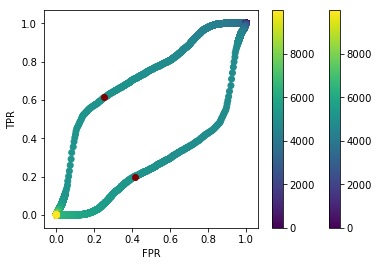

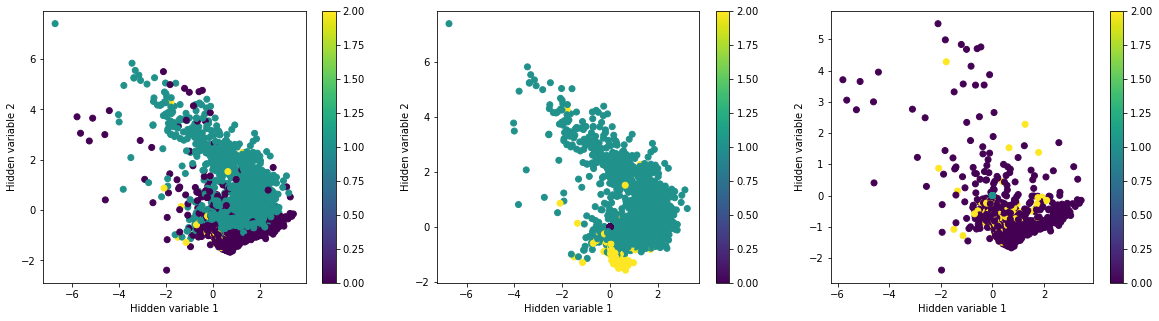

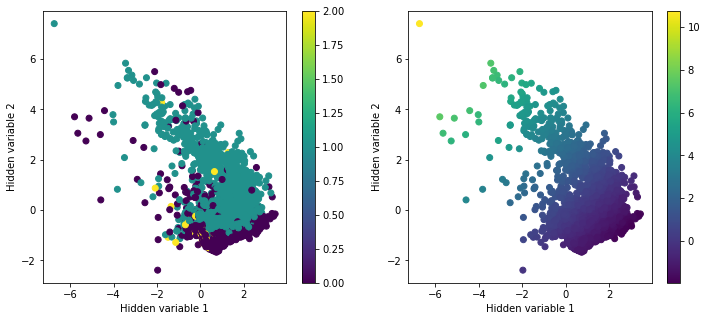

10000
AUC: 0.262231838932
10000
AUC: 0.737768161068
I =  9999 this time, the AUC is: 0.737768161068
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 13s - loss: -7287.8748 - val_loss: -7836.4150
Epoch 2/50
12000/12000 [==============================] - 12s - loss: -7867.4231 - val_loss: -8023.5727
Epoch 3/50
12000/12000 [==============================] - 13s - loss: -7963.1870 - val_loss: -8029.9524
Epoch 4/50
12000/12000 [==============================] - 13s - loss: -8000.3488 - val_loss: -7987.1470
Epoch 5/50
12000/12000 [==============================] - 12s - loss: -8000.6709 - val_loss: -8049.2526
Epoch 6/50
12000/12000 [==============================] - 12s - loss: -8009.6680 - val_loss: -8017.1300
Epoch 7/50
12000/12000 [==============================] - 13s - loss: -8010.8875 - val_loss: -7628.6066
Epoch 8/50
12000/12000 [==============================] - 12s - loss: -8006.3838 - val_loss: -7979.3310
Epoch 9/50
12000/12

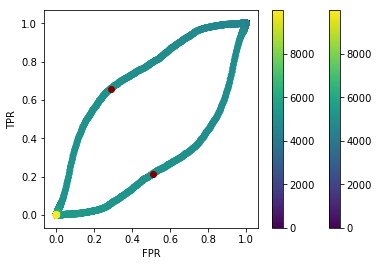

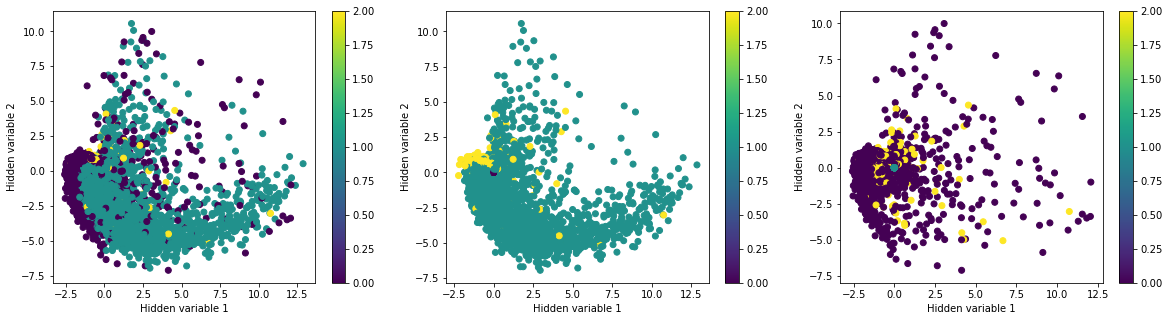

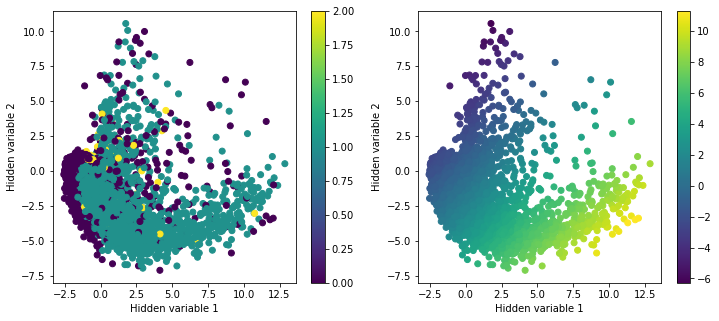

10000
AUC: 0.171960788231
10000
AUC: 0.828039211769
I =  9999 this time, the AUC is: 0.828039211769
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 13s - loss: -7347.2273 - val_loss: -6702.0074
Epoch 2/50
12000/12000 [==============================] - 12s - loss: -7835.3105 - val_loss: -8014.9206
Epoch 3/50
12000/12000 [==============================] - 13s - loss: -7935.0383 - val_loss: -8020.4419
Epoch 4/50
12000/12000 [==============================] - 13s - loss: -7983.0562 - val_loss: -8027.1131
Epoch 5/50
12000/12000 [==============================] - 12s - loss: -8010.4336 - val_loss: -7942.4081
Epoch 6/50
12000/12000 [==============================] - 13s - loss: -8015.8564 - val_loss: -8034.1460
Epoch 7/50
12000/12000 [==============================] - 12s - loss: -8011.5897 - val_loss: -8044.0176
Epoch 8/50
12000/12000 [==============================] - 12s - loss: -7997.6858 - val_loss: -8041.7053
Epoch 9/50
12000/12

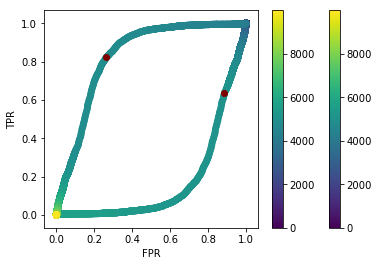

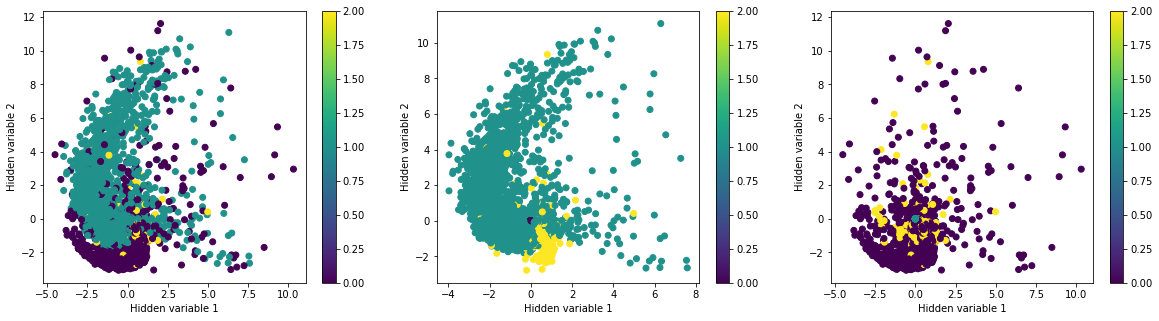

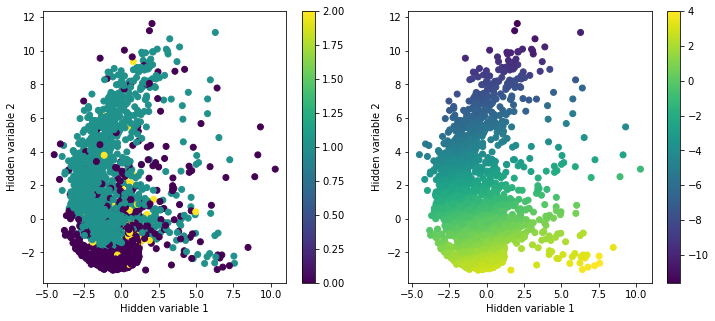

10000
AUC: 0.843565218535
10000
AUC: 0.156434781465
I =  9999 this time, the AUC is: 0.843565218535
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 13s - loss: -7244.3246 - val_loss: -6456.2363
Epoch 2/50
12000/12000 [==============================] - 12s - loss: -7413.9739 - val_loss: -7809.3505
Epoch 3/50
12000/12000 [==============================] - 13s - loss: -7895.7390 - val_loss: -7889.0744
Epoch 4/50
12000/12000 [==============================] - 13s - loss: -7988.3443 - val_loss: -8050.2619
Epoch 5/50
12000/12000 [==============================] - 12s - loss: -8009.4453 - val_loss: -7929.9809
Epoch 6/50
12000/12000 [==============================] - 12s - loss: -8004.2773 - val_loss: -8025.0845
Epoch 7/50
12000/12000 [==============================] - 12s - loss: -8031.3047 - val_loss: -8053.2798
Epoch 8/50
12000/12000 [==============================] - 13s - loss: -8017.6421 - val_loss: -7980.5798
Epoch 9/50
12000/12

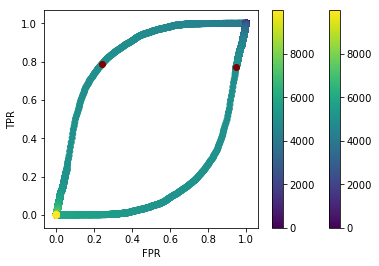

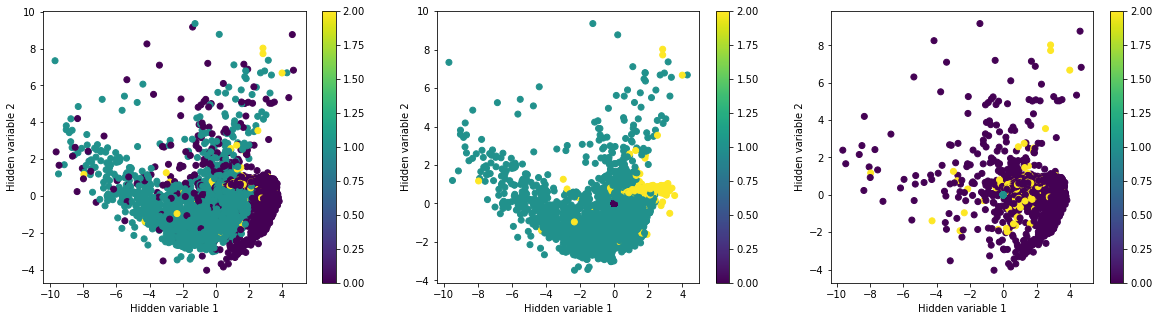

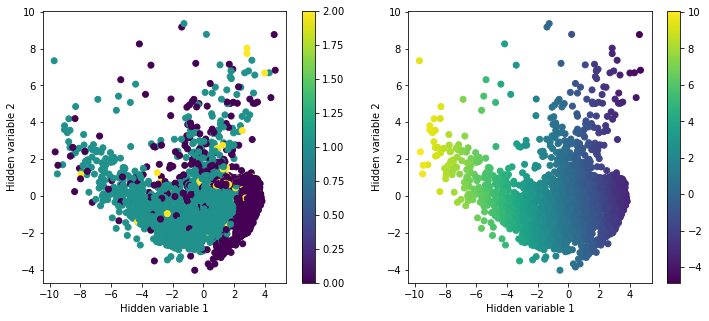

10000
AUC: 0.165849647279
10000
AUC: 0.834150352721
I =  9999 this time, the AUC is: 0.834150352721
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 13s - loss: -7318.9051 - val_loss: -7813.3682
Epoch 2/50
12000/12000 [==============================] - 12s - loss: -7860.5280 - val_loss: -7902.8536
Epoch 3/50
12000/12000 [==============================] - 12s - loss: -7946.8639 - val_loss: -8038.9051
Epoch 4/50
12000/12000 [==============================] - 12s - loss: -7983.1947 - val_loss: -8059.4184
Epoch 5/50
12000/12000 [==============================] - 12s - loss: -7998.1272 - val_loss: -8051.6572
Epoch 6/50
12000/12000 [==============================] - 12s - loss: -8018.2273 - val_loss: -7999.6414
Epoch 7/50
12000/12000 [==============================] - 12s - loss: -8011.6782 - val_loss: -8048.4571
Epoch 8/50
12000/12000 [==============================] - 12s - loss: -8012.9100 - val_loss: -7910.4643
Epoch 9/50
12000/12

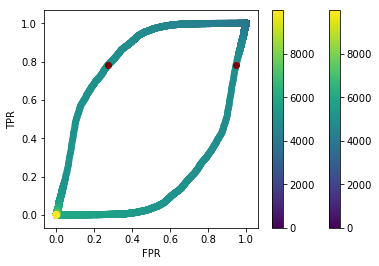

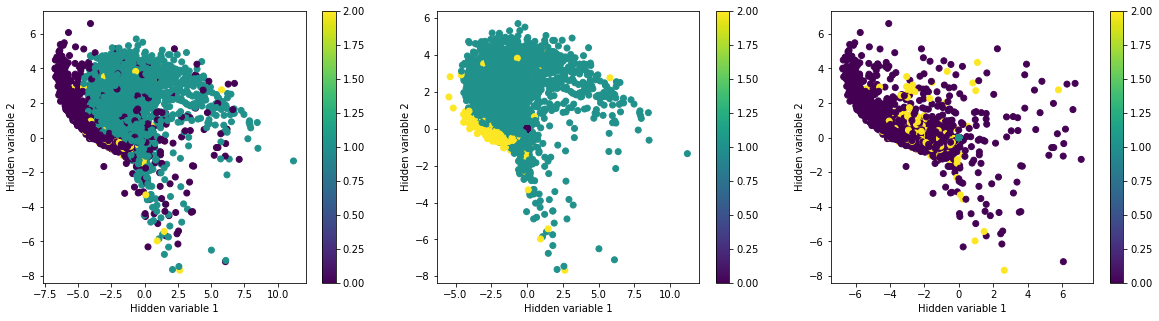

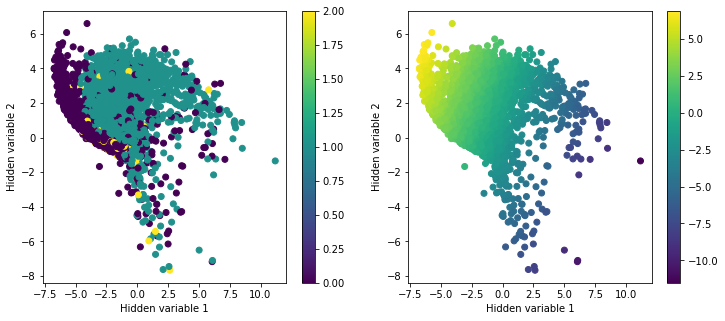

10000
AUC: 0.65583355852
10000
AUC: 0.34416644148
I =  9999 this time, the AUC is: 0.65583355852
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 13s - loss: -7297.4877 - val_loss: -7704.4141
Epoch 2/50
12000/12000 [==============================] - 12s - loss: -7900.1455 - val_loss: -7711.5043
Epoch 3/50
12000/12000 [==============================] - 12s - loss: -7955.9559 - val_loss: -7959.2721
Epoch 4/50
12000/12000 [==============================] - 12s - loss: -7978.9507 - val_loss: -7954.1922
Epoch 5/50
12000/12000 [==============================] - 12s - loss: -8011.6039 - val_loss: -8044.3454
Epoch 6/50
12000/12000 [==============================] - 12s - loss: -8002.5285 - val_loss: -8064.3132
Epoch 7/50
12000/12000 [==============================] - 12s - loss: -8021.6846 - val_loss: -8066.0062oss
Epoch 8/50
12000/12000 [==============================] - 12s - loss: -8032.9302 - val_loss: -8053.1256
Epoch 9/50
12000/12

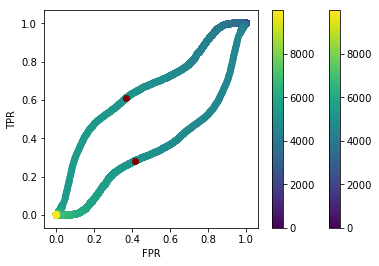

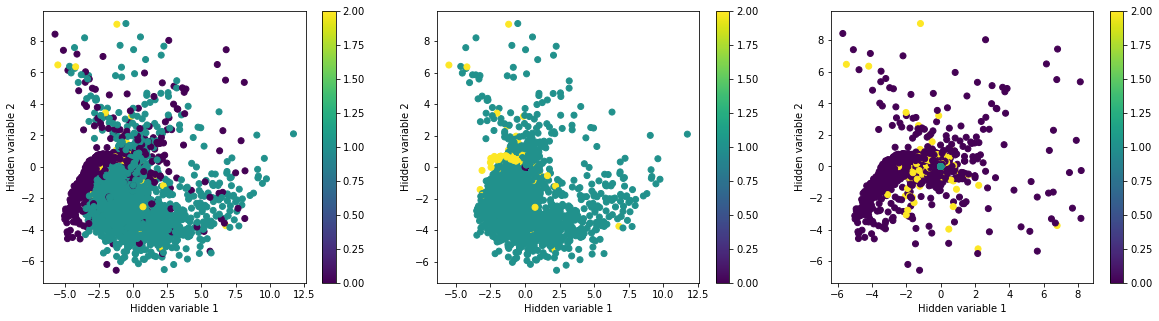

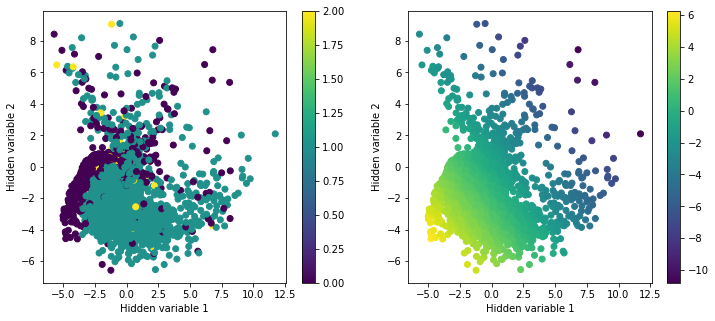

10000
AUC: 0.537552601967
10000
AUC: 0.462447398033
I =  9999 this time, the AUC is: 0.537552601967
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 13s - loss: -7379.5940 - val_loss: -7977.9525
Epoch 2/50
12000/12000 [==============================] - 12s - loss: -7920.4104 - val_loss: -7941.5610
Epoch 3/50
12000/12000 [==============================] - 13s - loss: -7952.7499 - val_loss: -8007.7477
Epoch 4/50
12000/12000 [==============================] - 12s - loss: -8006.3017 - val_loss: -8039.1152
Epoch 5/50
12000/12000 [==============================] - 10s - loss: -7995.2613 - val_loss: -8046.5072
Epoch 6/50
12000/12000 [==============================] - 10s - loss: -8011.9804 - val_loss: -8015.9869
Epoch 7/50
12000/12000 [==============================] - 10s - loss: -8024.7125 - val_loss: -8022.7683
Epoch 8/50
12000/12000 [==============================] - 10s - loss: -8035.4758 - val_loss: -8053.0185
Epoch 9/50
12000/12

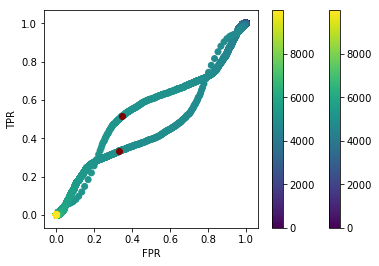

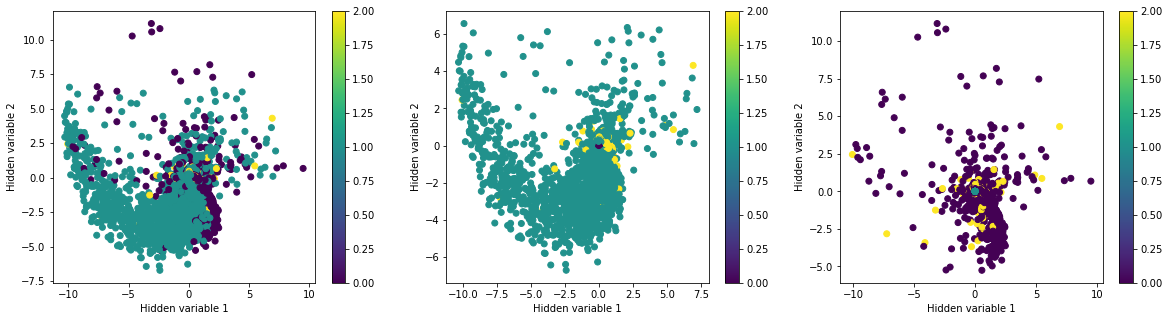

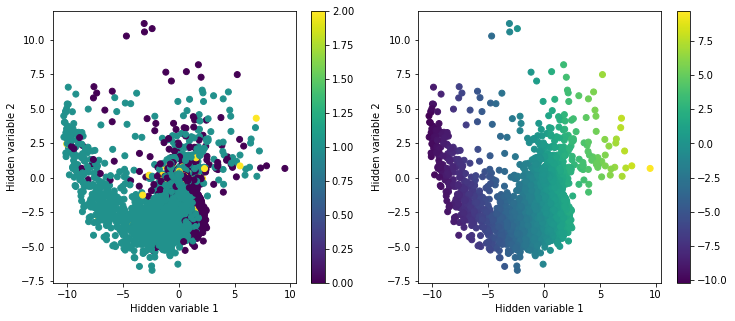

10000
AUC: 0.860683153238
10000
AUC: 0.139316846762
I =  9999 this time, the AUC is: 0.860683153238


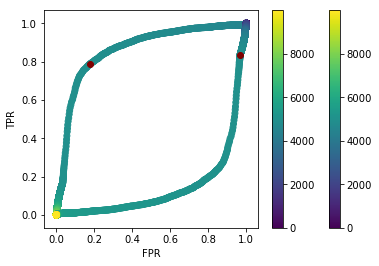

In [7]:
for xunhuan in range(10):
    batch_size =100
    latent_dim = 2
    nb_epoch = 50  
    epsilon_std = 0.1 
    intermediate_dim =256
    original_dim = 64*64

    #USE = 'autoencoder'
    USE = 'vae'
    #encoder:

    input_img = Input(shape=(64,64,3))


    x = Conv2D(40, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(input_img)
    x = MaxPooling2D((2, 2),  padding='same')(x)

    x = Conv2D(40, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    x = MaxPooling2D((2, 2),  padding='same')(x)

    x = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    x = MaxPooling2D((2, 2),  padding='same')(x)

    x = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    x = MaxPooling2D((2, 2),  padding='same')(x)

    x = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    x = MaxPooling2D((2, 2),  padding='same')(x)

    #x = Conv2D(5, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    #x = MaxPooling2D((2, 2),  padding='same')(x)

    visual = Flatten()(x)
    h_1 = Dense(intermediate_dim, activation='tanh')(visual)
    encoded = Dense(latent_dim, activation='relu')(h_1)

    z_mean = Dense(latent_dim)(h_1)
    z_log_var = Dense(latent_dim)(h_1)

    def sampling(args):   
        z_mean, z_log_var = args  
        epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0.,stddev=epsilon_std)
        return z_mean + K.exp(z_log_var / 2)* epsilon

    z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    if USE == 'vae':
        h_3 = Dense(intermediate_dim,activation='tanh')(z)#for VAE

    if USE == 'autoencoder':
        h_3 = Dense(intermediate_dim,activation='tanh')(encoded)#for AE


    h_4 = Dense(20*2*2,activation='relu')(h_3)
    h_5 = Reshape((2,2,20))(h_4)


    x = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(h_5)
    x = UpSampling2D((2, 2))(x)

    x = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    x = UpSampling2D((2, 2))(x)

    x = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    x = UpSampling2D((2, 2))(x)

    x = Conv2D(40, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    x = UpSampling2D((2, 2))(x)

    x = Conv2D(80,  (3, 3), activation='tanh',padding='same',kernel_initializer='normal')(x)
    x = UpSampling2D((2, 2))(x)

    decoded = Conv2D(3, (3, 3), activation='tanh', padding='same')(x)

    EarlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')


    def vae_loss(x, decoded):
        xent_loss = K.sum(K.sum(objectives.binary_crossentropy(x ,decoded),axis=-1),axis=-1)
        kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1) 
        return xent_loss + 1*kl_loss  

    def ae_loss(x, decoded):  
        xent_loss = original_dim * objectives.mean_squared_error(x,decoded)
        return xent_loss

    if USE == 'autoencoder':
        autoencoder = Model(inputs=input_img, outputs=decoded)
        autoencoder.compile(optimizer='rmsprop', loss=ae_loss)
    if USE == 'vae':
        vae = Model(inputs=input_img, outputs=decoded) 
        vae.compile(optimizer='rmsprop', loss=vae_loss)
    
    vae.fit(train_data[:12000], train_data[:12000],
        shuffle=True,
        epochs=50,
        batch_size=batch_size,
        validation_data=(train_data[12000:14100],train_data[12000:14100]),callbacks=[EarlyStopping])
        
    lower_lim = 0
    upper_lim = 14100

    label_value = np.zeros(len(train_label))
    for i in range(len(label_value)):
        label_value[i] =np.argmax(train_label[i])

    vis = Model(input_img, z_mean)

    # display a 2D plot of the digit classes in the latent space  
    x_vis = vis.predict(train_data[lower_lim:upper_lim], batch_size=batch_size)

    x_vis_1 = vis.predict(train_data[lower_lim:upper_lim], batch_size=batch_size)  
    x_vis_1[label_value[lower_lim:upper_lim]<1]=0

    x_vis_2 = vis.predict(train_data[lower_lim:upper_lim], batch_size=batch_size)  
    x_vis_2[label_value[lower_lim:upper_lim]==1]=0

    plt.figure(figsize=(20, 5))

    ax = plt.subplot(1,3,1)
    plt.scatter( x_vis[:, 0] ,x_vis[:, 1],c=label_value[lower_lim:upper_lim])
    plt.colorbar()
    plt.xlabel("Hidden variable 1")
    plt.ylabel("Hidden variable 2")
    ax = plt.subplot(1,3,2)
    plt.scatter( x_vis_1[:, 0] ,x_vis_1[:, 1],c=label_value[lower_lim:upper_lim])
    plt.colorbar()
    plt.xlabel("Hidden variable 1")
    plt.ylabel("Hidden variable 2")
    ax = plt.subplot(1,3,3)
    plt.scatter( x_vis_2[:, 0] ,x_vis_2[:, 1],c=label_value[lower_lim:upper_lim])
    plt.colorbar()
    plt.xlabel("Hidden variable 1")
    plt.ylabel("Hidden variable 2")
    plt.show()
    
    lower_lim = 0
    upper_lim = 14100


    vis = Model(input_img, z_mean)
    # display a 2D plot of the digit classes in the latent space
    x_vis = vis.predict(train_data[lower_lim:upper_lim], batch_size=batch_size)
    n_neighbors = 10
    n_components = 1
    isomap = manifold.Isomap(n_neighbors, n_components)
    hid_pred = vis.predict(train_data[lower_lim:upper_lim], batch_size=batch_size)
    Y_pred = isomap.fit_transform(hid_pred)


    plt.figure(figsize=(12, 5))

    ax = plt.subplot(1,2,1)
    plt.scatter( x_vis[:, 0] ,x_vis[:, 1],c=label_value[lower_lim:upper_lim])
    plt.colorbar()
    plt.xlabel("Hidden variable 1")
    plt.ylabel("Hidden variable 2")
    ax = plt.subplot(1,2,2)
    plt.scatter( x_vis[:, 0] ,x_vis[:, 1],c=Y_pred)
    plt.colorbar()
    plt.xlabel("Hidden variable 1")
    plt.ylabel("Hidden variable 2")
    plt.show()
    
    
    Y_pred = -Y_pred
    thr_min = -15
    thr_max = 15
    test_accuracy = 0.003
    test_range = int((thr_max - thr_min)/test_accuracy)
    print(test_range)
    FP = []
    TP = []
    TN = []
    FN = []
    TA = np.ones((Y_pred.shape[0],))
    TA[Class[lower_lim:upper_lim] ==0 ] = 0
    TA[Class[lower_lim:upper_lim] ==2 ] = 0

    for i in range(test_range):
        FP_temp = np.zeros((Y_pred.shape[0]))
        TP_temp = np.zeros((Y_pred.shape[0]))
        TN_temp = np.zeros((Y_pred.shape[0]))
        FN_temp = np.zeros((Y_pred.shape[0]))
        LA = np.zeros((Y_pred.shape[0],))
        thr_now = thr_min+ i*test_accuracy
        LA[Y_pred[:,0] > thr_now] = 1
        for j in range(Y_pred.shape[0]):
            if LA[j]==0:
                if TA[j]==1:
                    FN_temp[j] = 1
                else:
                    TN_temp[j] = 1
            else:
                if TA[j] == 1:
                    TP_temp[j] = 1
                else:
                    FP_temp[j] = 1
        FP.append(FP_temp)
        TP.append(TP_temp)
        TN.append(TN_temp)
        FN.append(FN_temp)

    TPR = np.zeros((test_range,))
    FPR = np.zeros((test_range,))
    TPR = np.sum(TP,axis=-1)/(np.sum(TP,axis=-1)+np.sum(FN,axis=-1))
    FPR = np.sum(FP,axis=-1)/(np.sum(FP,axis=-1)+np.sum(TN,axis=-1))

    plt.scatter(FPR,TPR,c=[i for i in range(test_range)])

    plt.colorbar()
    plt.scatter(FPR[np.argmin((TPR-1)**2 + FPR**2)],TPR[np.argmin((TPR-1)**2 + FPR**2)],c=0,cmap='OrRd_r')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    #argmax, OrRed

    print("AUC:",metrics.auc(FPR, TPR))
    AUC_1 = metrics.auc(FPR, TPR)
    
    Y_pred = -Y_pred
    thr_min = -15
    thr_max = 15
    test_accuracy = 0.003
    test_range = int((thr_max - thr_min)/test_accuracy)
    print(test_range)
    FP = []
    TP = []
    TN = []
    FN = []
    TA = np.ones((Y_pred.shape[0],))
    TA[Class[lower_lim:upper_lim] ==0 ] = 0
    TA[Class[lower_lim:upper_lim] ==2 ] = 0

    for i in range(test_range):
        FP_temp = np.zeros((Y_pred.shape[0]))
        TP_temp = np.zeros((Y_pred.shape[0]))
        TN_temp = np.zeros((Y_pred.shape[0]))
        FN_temp = np.zeros((Y_pred.shape[0]))
        LA = np.zeros((Y_pred.shape[0],))
        thr_now = thr_min+ i*test_accuracy
        LA[Y_pred[:,0] > thr_now] = 1
        for j in range(Y_pred.shape[0]):
            if LA[j]==0:
                if TA[j]==1:
                    FN_temp[j] = 1
                else:
                    TN_temp[j] = 1
            else:
                if TA[j] == 1:
                    TP_temp[j] = 1
                else:
                    FP_temp[j] = 1
        FP.append(FP_temp)
        TP.append(TP_temp)
        TN.append(TN_temp)
        FN.append(FN_temp)

    TPR = np.zeros((test_range,))
    FPR = np.zeros((test_range,))
    TPR = np.sum(TP,axis=-1)/(np.sum(TP,axis=-1)+np.sum(FN,axis=-1))
    FPR = np.sum(FP,axis=-1)/(np.sum(FP,axis=-1)+np.sum(TN,axis=-1))

    plt.scatter(FPR,TPR,c=[i for i in range(test_range)])

    plt.colorbar()
    plt.scatter(FPR[np.argmin((TPR-1)**2 + FPR**2)],TPR[np.argmin((TPR-1)**2 + FPR**2)],c=0,cmap='OrRd_r')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    #argmax, OrRed

    print("AUC:",metrics.auc(FPR, TPR))
    AUC_2 = metrics.auc(FPR, TPR)
    AUC = AUC_2
    if AUC_1>AUC_2:
        AUC = AUC_1
    print("I = ",i,"this time, the AUC is:",AUC)
        

In [2]:
AUC = [0.789398571743,0.769831606651,0.725275885901,0.737768161068,0.828039211769,0.843565218535,0.834150352721,0.65583355852,0.537552601967,0.860683153238]
#AUC = [0.677345410653,0.875349246322,0.61917419022,0.867868644786,0.85819723122,0.806528454172]
AUC = np.asarray(AUC)
print(np.mean(AUC))

0.758209832211


(array([ 1.,  0.,  0.,  1.,  0.,  1.,  1.,  2.,  1.,  3.]),
 array([ 0.5375526 ,  0.56986566,  0.60217871,  0.63449177,  0.66680482,
         0.69911788,  0.73143093,  0.76374399,  0.79605704,  0.8283701 ,
         0.86068315]),
 <a list of 10 Patch objects>)

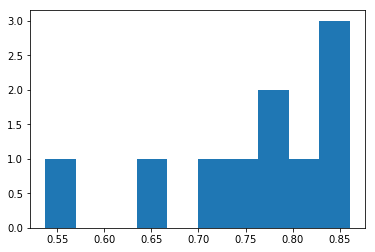

In [3]:
plt.hist(AUC)